In [1]:
## page.74 

import pandas as pd
data=pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/Ex_CEOSalary.csv', encoding='UTF-8-sig')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [2]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [3]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [4]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


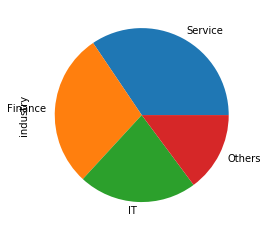

In [5]:
%matplotlib inline
data['industry'].value_counts().plot(kind="pie")

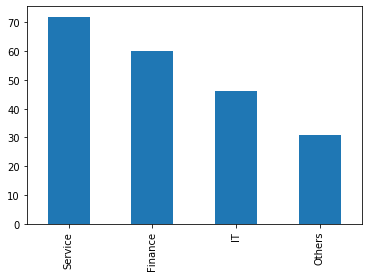

In [6]:
data['industry'].value_counts().plot(kind="bar")

In [7]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [8]:
## 왜도는 클 수록 우측 꼬리분포 0일때 좌우 대칭 음수면 오른쪽 자료가 많고 양수면 왼쪽 자료가 ㅁ낳다.
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [9]:
## 첨도는 0이면 정규분포의 높이와 동일 값이 클수록 중심에 자료가 몰려있다.
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

In [10]:
data.quantile()

salary    1039.000000
sales     3705.199951
roe         15.500000
Name: 0.5, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BA3E55C8>,
      dtype=object)

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


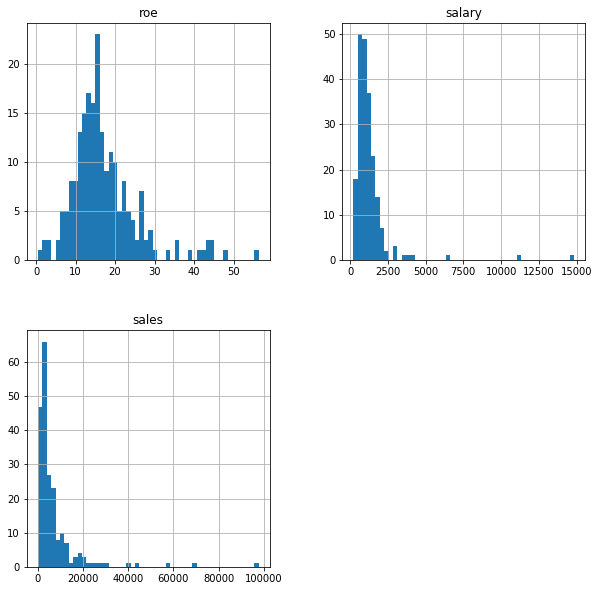

In [11]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(10,10))

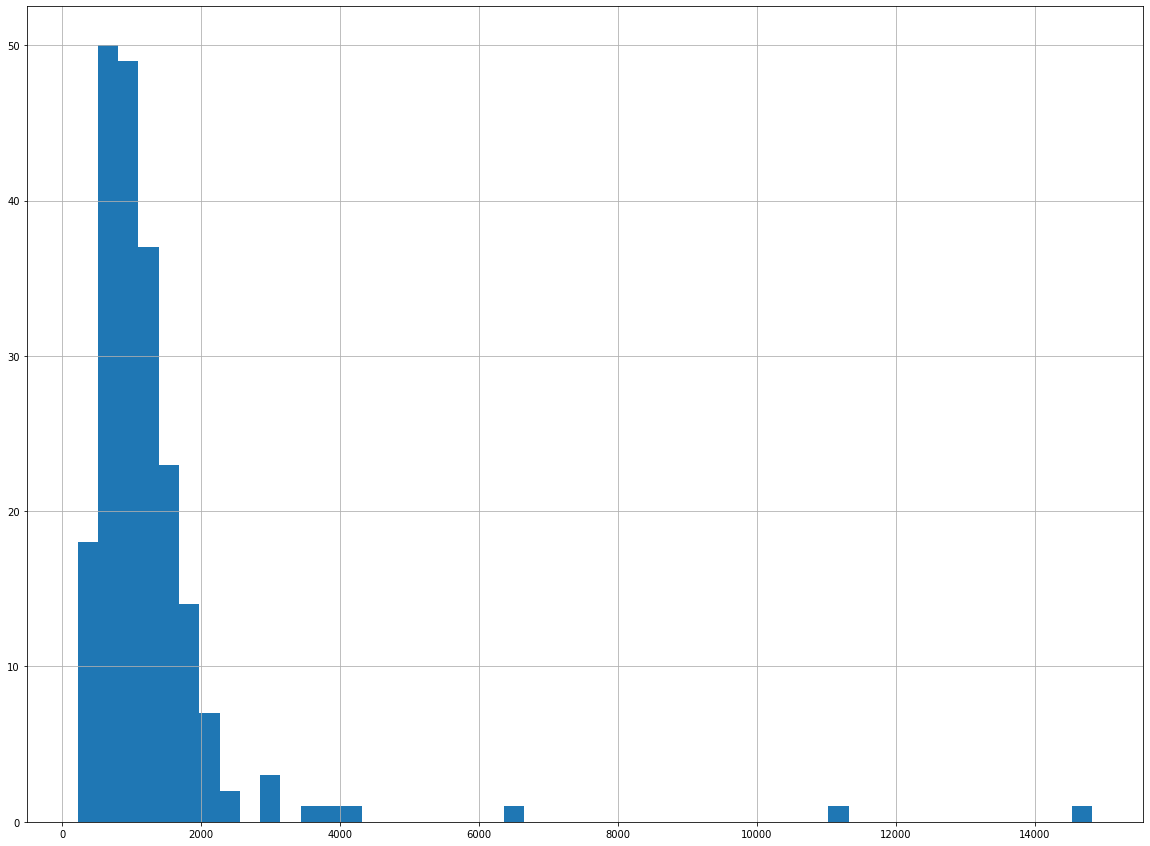

In [12]:
data['salary'].hist(bins=50, figsize=(20,15))

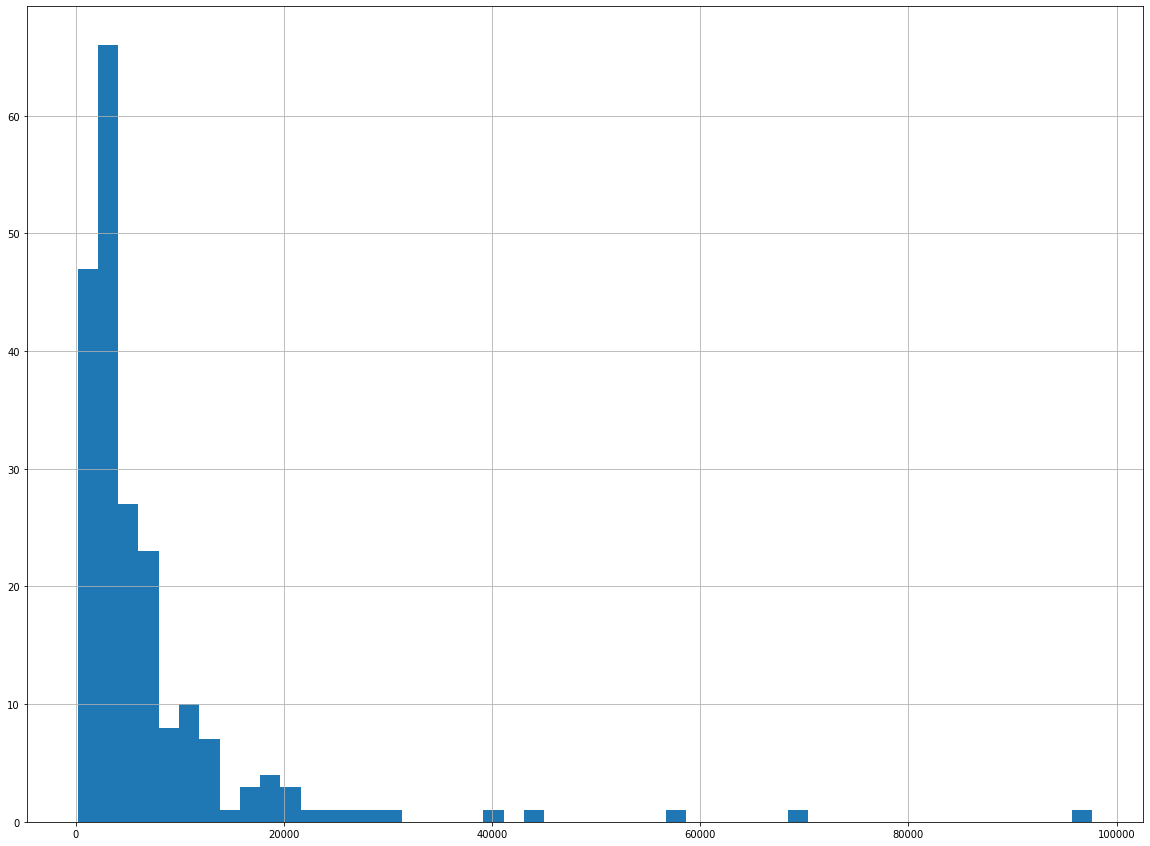

In [13]:
data['sales'].hist(bins=50, figsize=(20,15))

In [14]:
## Section02 이변량 데이터 검색 
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [15]:
data.corr(method="pearson")

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [16]:
data.corr(method="spearman")

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [17]:
data.corr(method="kendall")

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


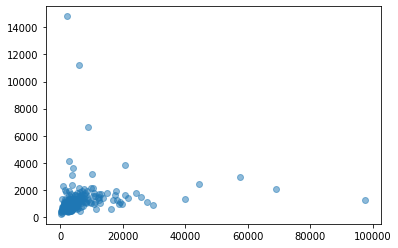

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

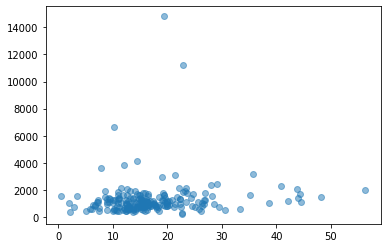

In [19]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()

In [20]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

In [21]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,Service
1,1001,9958.000000,10.9,Service
2,1122,6125.899902,23.5,Service
3,578,16246.000000,5.9,Service
4,1368,21783.199219,13.8,Service


Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BCF91A08>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000207BD0375C8>, <matplotlib.lines.Line2D object at 0x00000207BD04AE88>], 'caps': [<matplotlib.lines.Line2D object at 0x00000207BD04EF08>, <matplotlib.lines.Line2D object at 0x00000207BD04EB08>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000207BD04A348>], 'medians': [<matplotlib.lines.Line2D object at 0x00000207BD054C08>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000207BD054D08>], 'means': []})

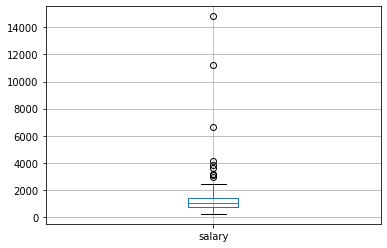

In [22]:
## Section03 이상치 처리
data.boxplot(column='salary', return_type='both')

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BD087848>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000207BCFC8708>, <matplotlib.lines.Line2D object at 0x00000207BCFC8788>], 'caps': [<matplotlib.lines.Line2D object at 0x00000207BCFCD3C8>, <matplotlib.lines.Line2D object at 0x00000207BCFE9DC8>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000207BCFC6948>], 'medians': [<matplotlib.lines.Line2D object at 0x00000207BCFE9608>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000207BCFBD1C8>], 'means': []})

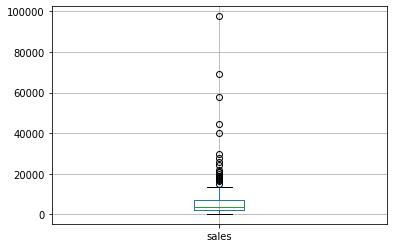

In [23]:
data.boxplot(column='sales', return_type='both')

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BCF674C8>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000207BCF775C8>, <matplotlib.lines.Line2D object at 0x00000207BCF77CC8>], 'caps': [<matplotlib.lines.Line2D object at 0x00000207BCF772C8>, <matplotlib.lines.Line2D object at 0x00000207BCF91DC8>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000207BCF4CB08>], 'medians': [<matplotlib.lines.Line2D object at 0x00000207BCF10288>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000207BCF10888>], 'means': []})

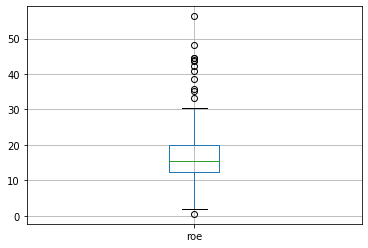

In [24]:
data.boxplot(column='roe', return_type='both')

In [25]:
## 3.1 salary 변수 이상치 처리
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary-Q1_salary
IQR_salary

671.0

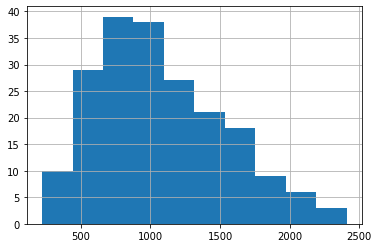

In [26]:
data_IQR=data[(data['salary']<Q3_salary + IQR_salary*1.5)&(data['salary']>Q1_salary-IQR_salary*1.5)]
data_IQR['salary'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BD106048>,
      dtype=object)

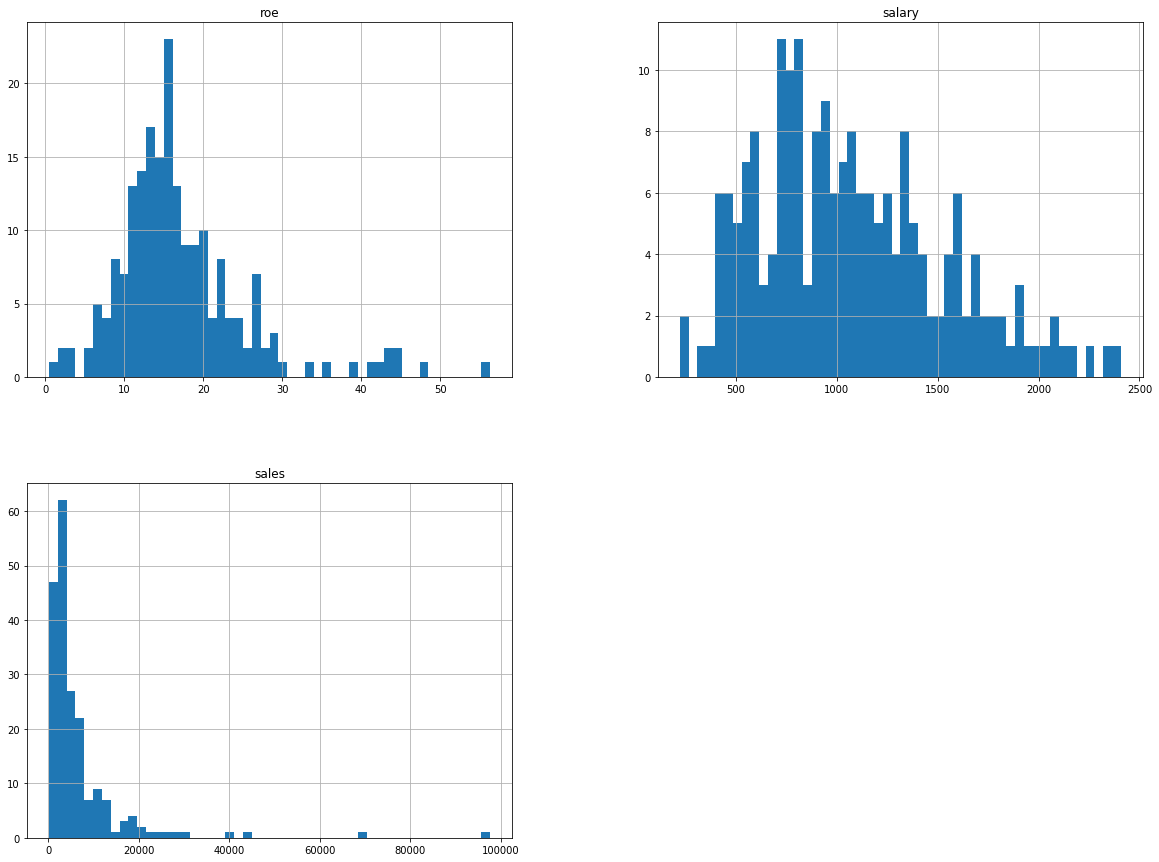

In [27]:
data_IQR.hist(bins=50, figsize=(20,15))

In [28]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


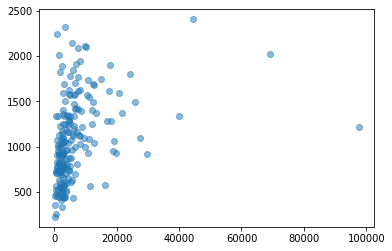

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.5)
plt.show()

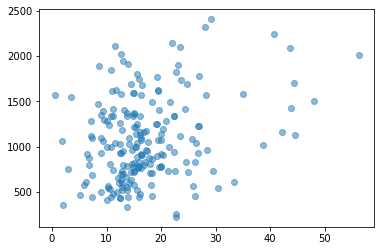

In [30]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5)
plt.show()

In [32]:
## 3.2 변수 이상치 처리 
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales

4966.6999511718695

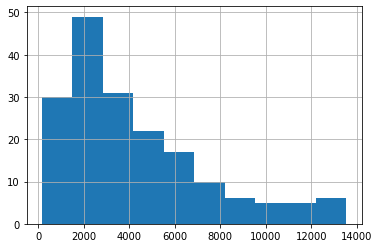

In [33]:
data_IQR = data[(data['sales'] < Q3_sales + 1.5*IQR_sales) & 
                (data['sales'] > Q1_sales - 1.5*IQR_sales) &
               (data['salary'] < Q3_salary + 1.5*IQR_salary) &
               (data['salary'] > Q1_salary - 1.5*IQR_salary)]
data_IQR['sales'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BD5249C8>,
      dtype=object)

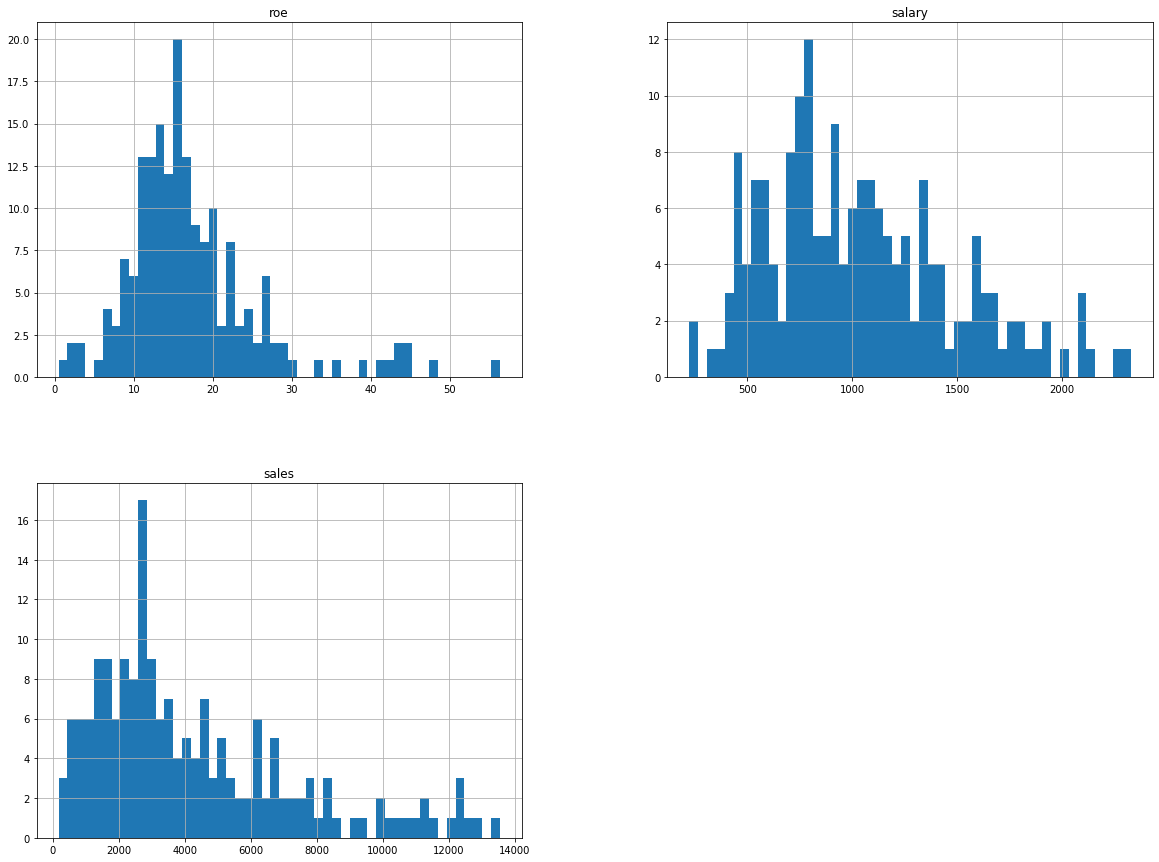

In [35]:
data_IQR.hist(bins=50, figsize=(20, 15))

In [36]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


In [37]:
## Section04 변수 변환
## 4.1 로그 변환
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BD7AF988>,
      dtype=object)

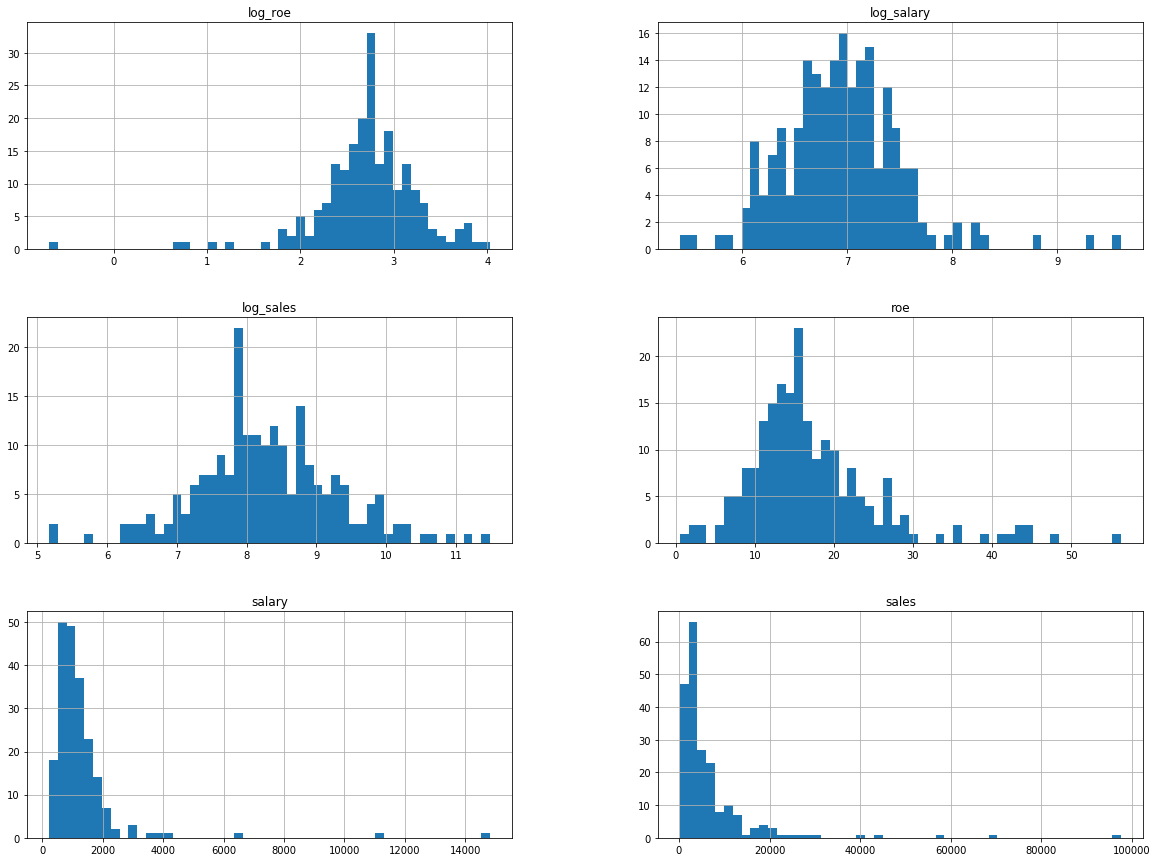

In [38]:
data.hist(bins=50, figsize=(20,15))

In [39]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


In [40]:
## 4.2 제곱근 변환
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BE0FA7C8>,
      dtype=object)

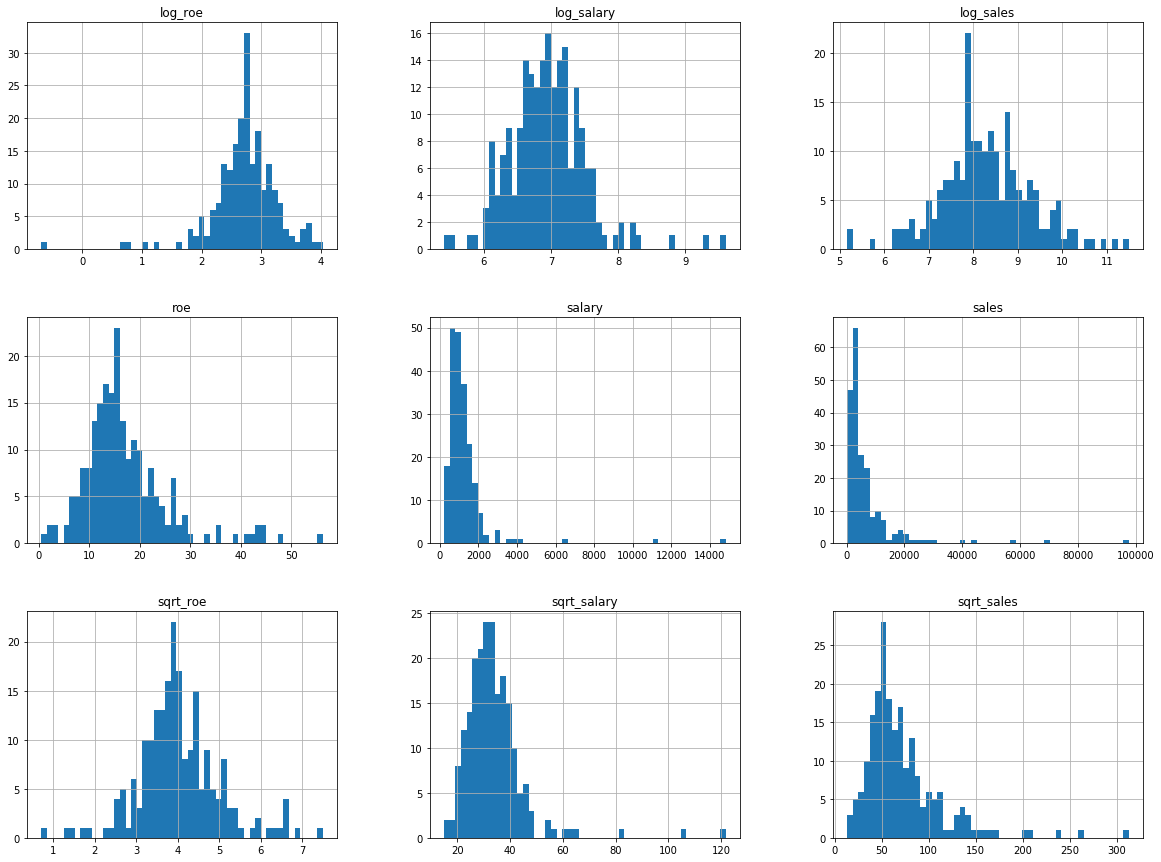

In [41]:
data.hist(bins=50, figsize=(20,15))

In [42]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


In [43]:
## Section 05 결측치 처리
import pandas as pd
data_mi = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/Ex_Missing.csv", encoding='utf-8-sig')
data_mi

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [44]:
## 5.1 결측치 확인 
pd.isnull(data_mi)
data_mi.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [46]:
data_mi.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [47]:
pd.notnull(data_mi)

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [48]:
data_mi.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [50]:
data_mi['sales'].isnull().sum()

2

In [54]:
data_mi.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [57]:
data_mi['missing'] = data_mi.isnull().sum(1)

In [58]:
data_mi

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [60]:
del data_mi['missing']

In [61]:
data_mi['valid'] = data_mi.notnull().sum(1)

In [62]:
data_mi

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [63]:
## 5.2 결측값 제거 dropna()
data_mi_del_row = data_mi.dropna(axis=0)

In [64]:
data_mi_del_row

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
3,578.0,16246.000000,5.900000,1,4
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4


In [65]:
data_mi_del_column = data_mi.dropna(axis=1)

In [66]:
data_mi_del_column

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


In [67]:
data_mi[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [69]:
data_mi[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [70]:
data_mi[['salary', 'sales', 'roe', 'industry']].dropna(axis=1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


In [71]:
## 5.3 결측값 대체

data_mi

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [72]:
data_0=data_mi

In [73]:
data_0 = data_mi.fillna(0)

In [74]:
data_0

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,0.0,9958.000000,10.900000,1,3
2,0.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,0.000000,13.800000,1,3
5,1145.0,0.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,0.000000,2,3


In [75]:
data_missing = data_mi.fillna('missing')

In [76]:
data_missing

,salary,sales,roe,industry,valid
0,1095,27595,14.1,1,4
1,missing,9958,10.9,1,3
2,missing,6125.9,23.5,1,3
3,578,16246,5.9,1,4
4,1368,missing,13.8,1,3
5,1145,missing,20,2,3
6,1078,2266.7,16.4,2,4
7,1094,2966.8,16.3,2,4
8,1237,4570.2,10.5,2,4
9,833,2830,missing,2,3


In [79]:
data_ffill=data_mi.fillna(method='ffill')

In [80]:
data_ffill

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1095.0,9958.000000,10.900000,1,3
2,1095.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,16246.000000,13.800000,1,3
5,1145.0,16246.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,10.500000,2,3


In [81]:
data_pad=data_mi.fillna(method='pad')
data_pad

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1095.0,9958.000000,10.900000,1,3
2,1095.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,16246.000000,13.800000,1,3
5,1145.0,16246.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,10.500000,2,3


In [83]:
data_bfill = data_mi.fillna(method='bfill')
data_bfill

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,578.0,9958.000000,10.900000,1,3
2,578.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,2266.699951,13.800000,1,3
5,1145.0,2266.699951,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [84]:
data_backfill = data_mi.fillna(method='backfill')
data_backfill

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,578.0,9958.000000,10.900000,1,3
2,578.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,2266.699951,13.800000,1,3
5,1145.0,2266.699951,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [85]:
data_mean = data_mi.fillna(data_mi.mean())
data_mean

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1053.5,9958.000000,10.900000,1,3
2,1053.5,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,9069.825012,13.800000,1,3
5,1145.0,9069.825012,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,14.600000,2,3


In [87]:
data_median = data_mi.fillna(data_mi.median())
data_median

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1094.5,9958.000000,10.900000,1,3
2,1094.5,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,5348.050049,13.800000,1,3
5,1145.0,5348.050049,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,14.100000,2,3


In [88]:
data_other_mean = data_mi.fillna(data_mi['sales'].mean())
data_other_mean

,salary,sales,roe,industry,valid
0,1095.000000,27595.000000,14.100000,1,4
1,9069.825012,9958.000000,10.900000,1,3
2,9069.825012,6125.899902,23.500000,1,3
3,578.000000,16246.000000,5.900000,1,4
4,1368.000000,9069.825012,13.800000,1,3
5,1145.000000,9069.825012,20.000000,2,3
6,1078.000000,2266.699951,16.400000,2,4
7,1094.000000,2966.800049,16.299999,2,4
8,1237.000000,4570.200195,10.500000,2,4
9,833.000000,2830.000000,9069.825012,2,3


In [90]:
data2=data_mi.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales'])==True, data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,valid,sales_new
0,1095.0,27595.000000,14.100000,1,4,27595.000000
1,NaN,9958.000000,10.900000,1,3,9958.000000
2,NaN,6125.899902,23.500000,1,3,6125.899902
3,578.0,16246.000000,5.900000,1,4,16246.000000
4,1368.0,NaN,13.800000,1,3,1368.000000
5,1145.0,NaN,20.000000,2,3,1145.000000
6,1078.0,2266.699951,16.400000,2,4,2266.699951
7,1094.0,2966.800049,16.299999,2,4,2966.800049
8,1237.0,4570.200195,10.500000,2,4,4570.200195
9,833.0,2830.000000,NaN,2,3,2830.000000


In [91]:
data_mi.groupby('industry').mean()

,salary,sales,roe,valid
industry,,,,
1,1013.666667,14981.224975,13.64,3.4
2,1077.400000,3158.425049,15.80,3.6


In [92]:
fill_mean_func = lambda g: g.fillna(g.mean())

In [93]:
data_group_mean = data_mi.groupby('industry').apply(fill_mean_func)
data_group_mean 

salary         sales        roe  industry  valid
industry                                                         
1        0  1095.000000  27595.000000  14.100000         1      4
         1  1013.666667   9958.000000  10.900000         1      3
         2  1013.666667   6125.899902  23.500000         1      3
         3   578.000000  16246.000000   5.900000         1      4
         4  1368.000000  14981.224975  13.800000         1      3
2        5  1145.000000   3158.425049  20.000000         2      3
         6  1078.000000   2266.699951  16.400000         2      4
         7  1094.000000   2966.800049  16.299999         2      4
         8  1237.000000   4570.200195  10.500000         2      4
         9   833.000000   2830.000000  15.800000         2      3

In [94]:
fill_values = {1:1000, 2:2000}

In [95]:
fill_func = lambda d: d.fillna(fill_values[d.name])

In [96]:
data_group_value=data_mi.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1000.0,9958.000000,10.900000,1,3
2,1000.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,1000.000000,13.800000,1,3
5,1145.0,2000.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,2000.000000,2,3


In [2]:
import pandas as pd 
data=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_raw.csv", encoding="utf-8-sig")
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [3]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B53EFB788>,
      dtype=object)

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


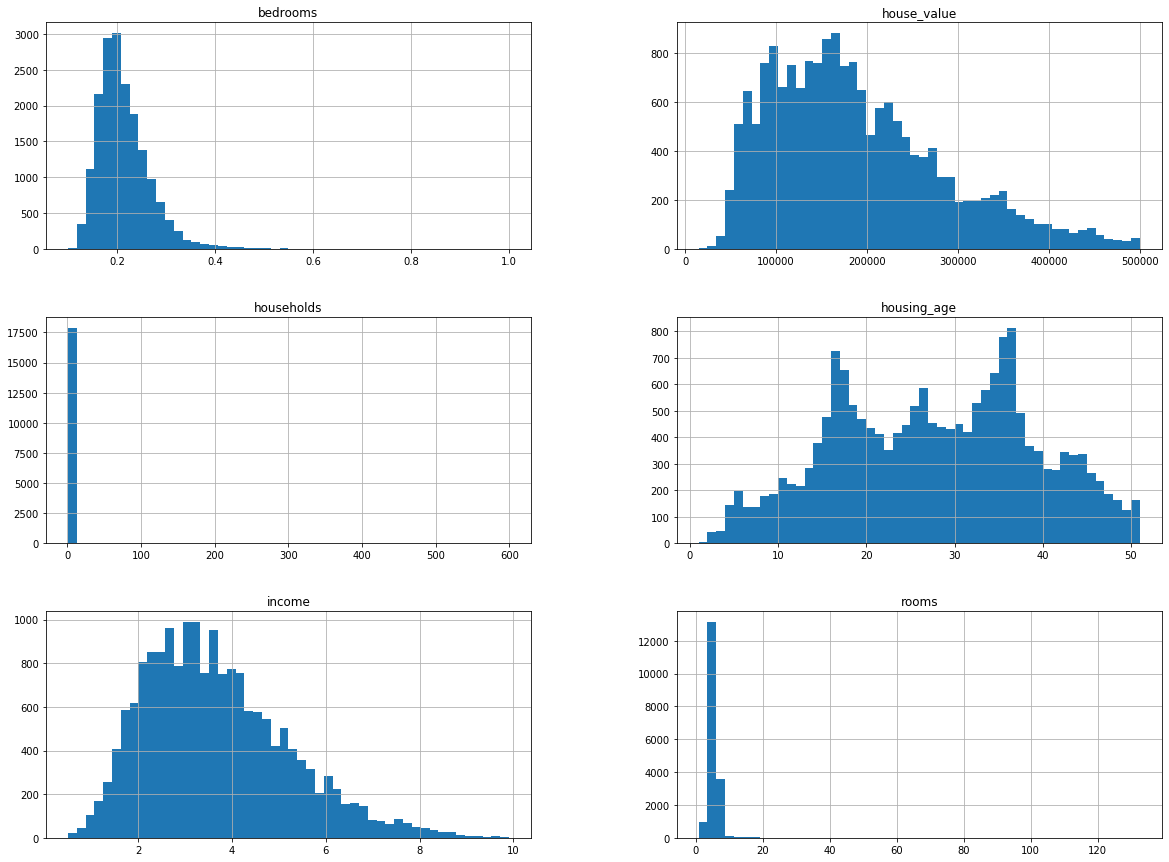

In [5]:
data.hist(bins=50, figsize=(20,15))

In [9]:
## 6.2 정제 전 선형회귀 적용
X=data[data.columns[0:5]]
y=data[["house_value"]]
X

,housing_age,income,bedrooms,households,rooms
0,23,6.7770,0.141112,2.442244,8.103960
1,49,6.0199,0.160984,2.726688,5.752412
2,35,5.1155,0.249061,1.902676,3.888078
3,32,4.7109,0.231383,1.913669,4.508393
4,21,4.5625,0.255583,3.092664,4.667954
...,...,...,...,...,...
17909,33,2.6750,0.246622,3.428571,4.698413
17910,39,2.3667,0.340771,1.876812,3.572464
17911,19,2.1000,0.386107,2.987805,3.774390
17912,16,1.6607,0.286275,2.236842,6.710526


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [15]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5463729131516732

In [17]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

-2.822064801016143

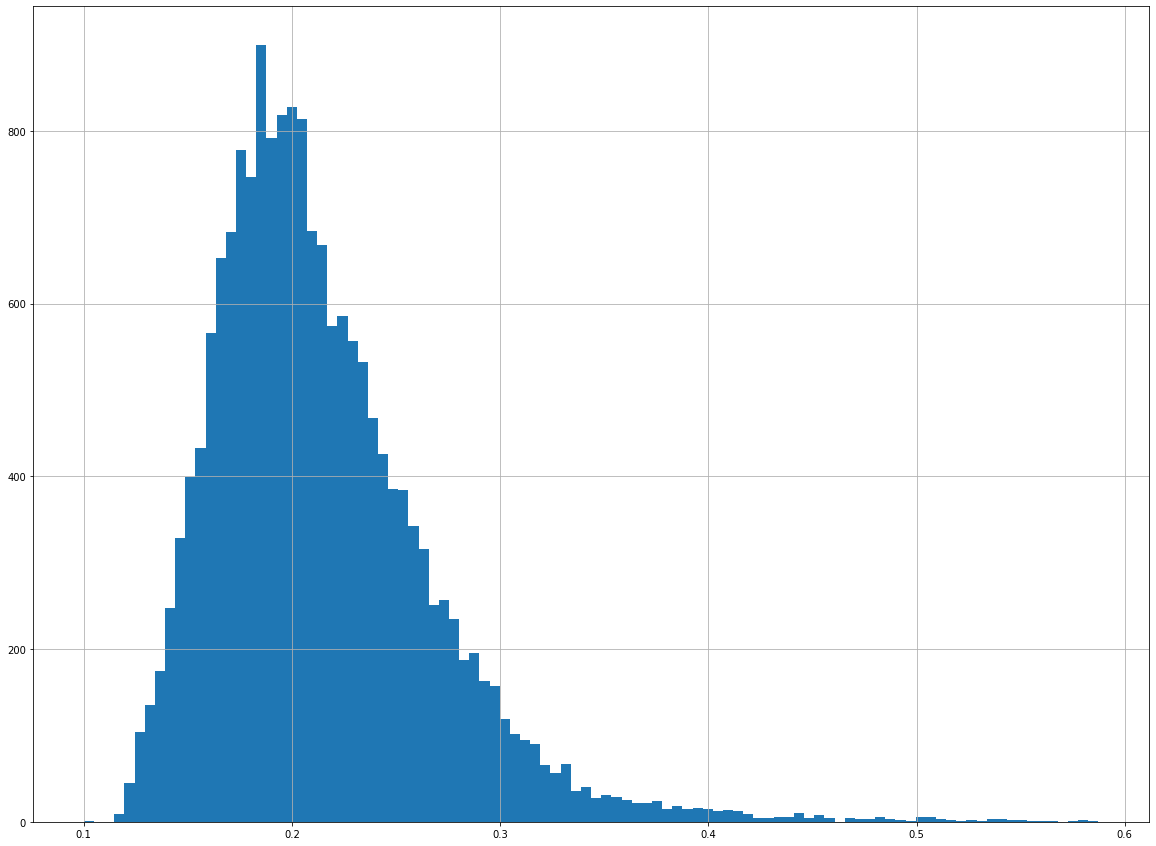

In [18]:
## 6.3 데이터 정제를 위한 세부 검토
data_bedroom=data[data['bedrooms']<0.6]
data_bedroom['bedrooms'].hist(bins=100, figsize=(20,15))

In [20]:
data_bedroom2=data[data['bedrooms']>0.6]
print(data_bedroom2['bedrooms'].value_counts())
data_bedroom2

1.000000    3
0.635258    1
0.602489    1
0.658869    1
0.700000    1
0.686114    1
0.923077    1
0.662539    1
0.627338    1
0.750000    1
0.613084    1
0.625887    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


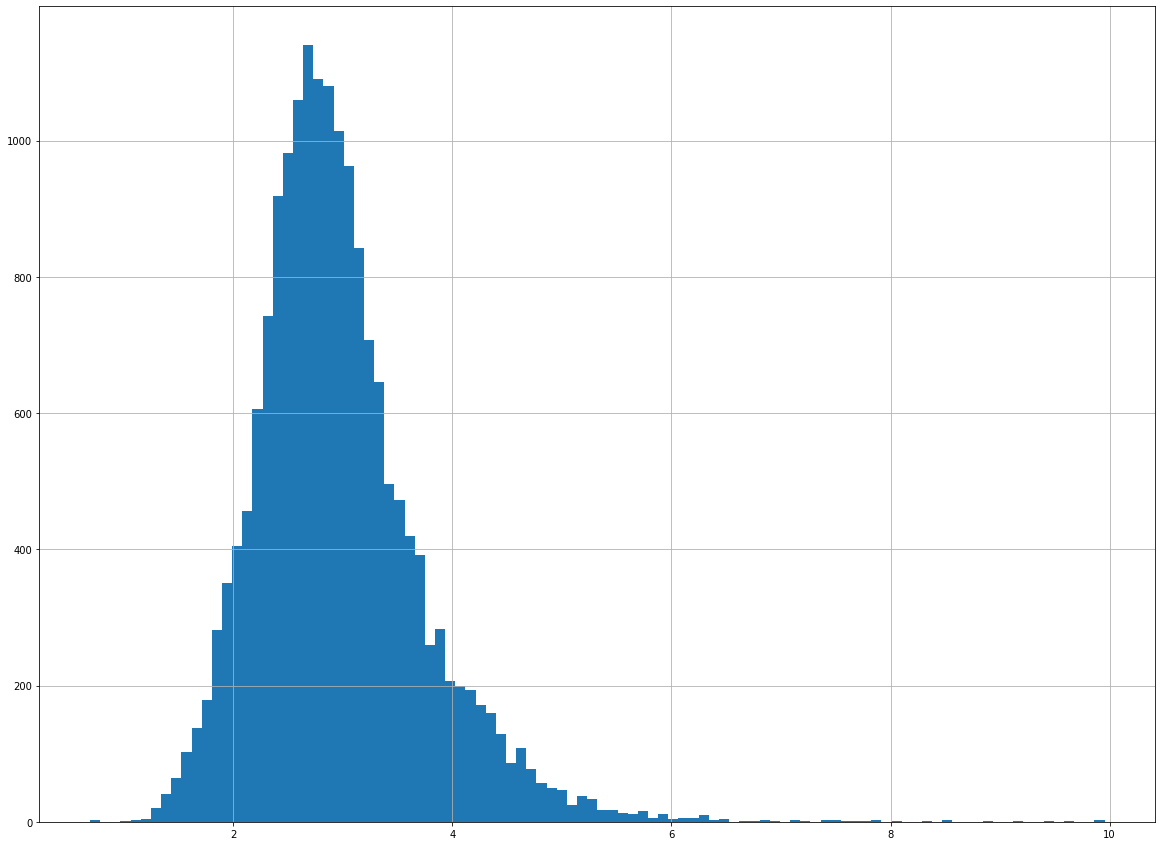

In [21]:
data_households=data[data['households']<10]
data_households['households'].hist(bins=100, figsize=(20,15))

In [23]:
data_households2=data[data['households']>=10]
print(data_households2['households'].value_counts())
data_households2

12.296089     1
11.634146     1
14.000000     1
63.750000     1
12.843750     1
18.500000     1
599.714286    1
19.312500     1
13.693487     1
16.937500     1
12.234043     1
16.048780     1
12.098940     1
51.400000     1
13.594828     1
10.153846     1
15.812155     1
18.444444     1
12.895397     1
10.980000     1
12.130081     1
33.952941     1
Name: households, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


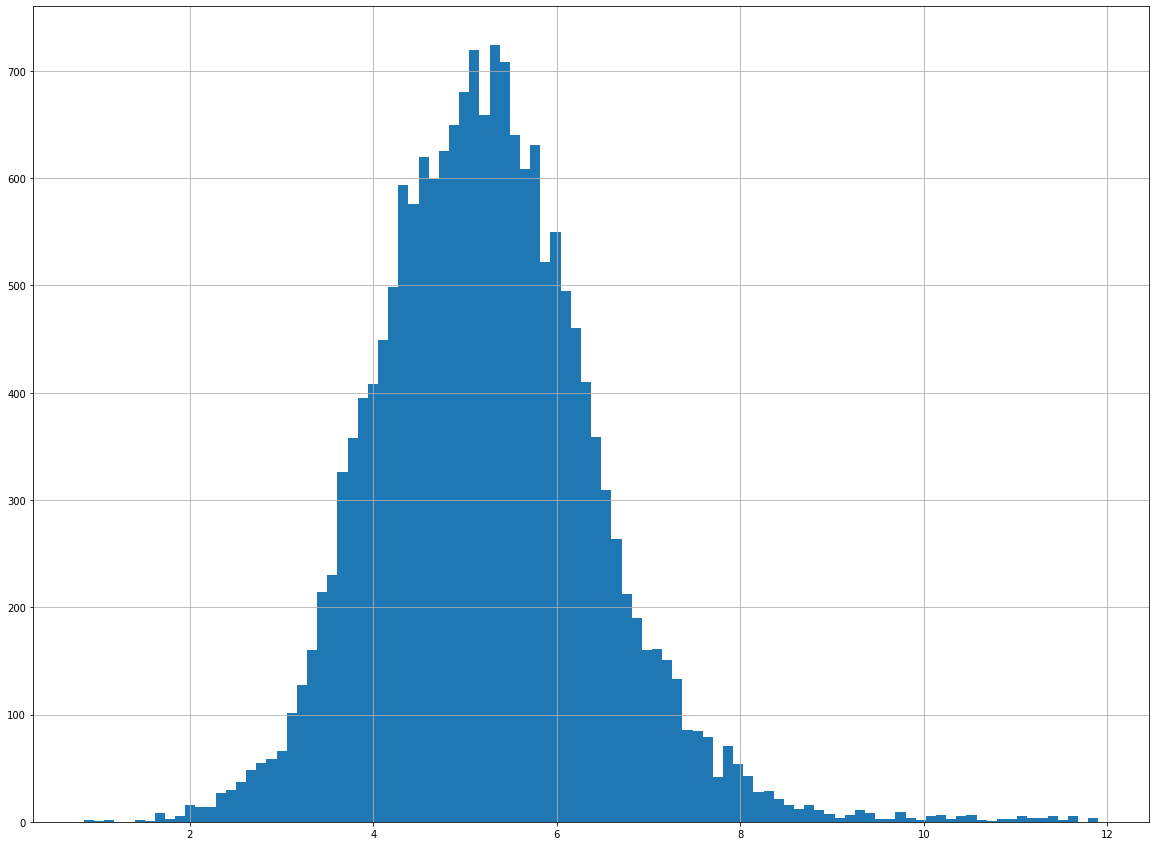

In [25]:
data_room=data[data['rooms']<12]
data_room['rooms'].hist(bins=100, figsize=(20,15))

In [26]:
new_data=data[(data['bedrooms']<0.5)&(data['households']<7)&(data['rooms']<12)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B5AF0DE88>,
      dtype=object)

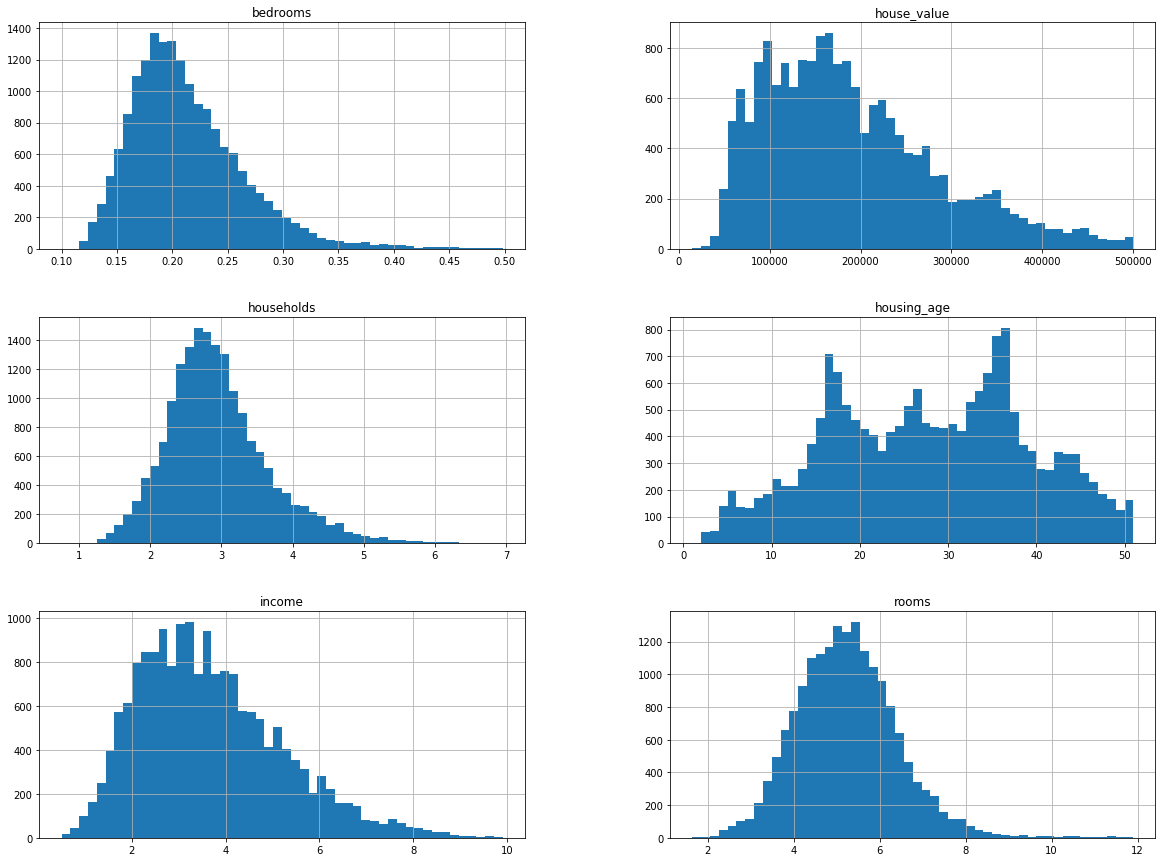

In [28]:
new_data.hist(bins=50, figsize=(20,15))

In [29]:
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


In [35]:
## 6.5 정제 후 데이터 선형회귀 적용

## 특성데이터셋, 레이블 데이터셋 나누기 
X=new_data[new_data.columns[0:5]]
y=new_data[["house_value"]]

## 학습용 데이터와 테스트용 데이터 구분을 위한 라이브러리 불러오기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

## 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()

## 훈련데이터 및 테스트데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

## 선형 모델 적용 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

## 훈련데이터 정확도 확인, R제곱 
pred_train=model.predict(X_scaled_minmax_train)
print("훈련데이터 정확도 {}".format(model.score(X_scaled_minmax_train, y_train)))



## 테스트데이터 정확도 확인
pred_test = model.predict(X_scaled_minmax_test)
print("테스트데이터 정확도 {}".format(model.score(X_scaled_minmax_test, y_test)))

훈련데이터 정확도 0.5695422440058738
테스트데이터 정확도 0.5861456800397589


In [30]:
new_data.to_csv('housing_price.csv', encoding='utf-8-sig', index=False)